This script is an exmaple for creating and fitting PSDs of data. Currently loads in .mat files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

In [2]:
def load_data(filepath, channels):
    data = sio.loadmat(filepath)
    tts = np.zeros((len(channels), data['Length'][0][0]))
    for n, i in enumerate(channels):
        tt = np.transpose(data[i])[0]
        tts[n] = tt
    return tts, data['Tinterval'][0][0]

def linewidth(f, f0, A, y, c):
    return A/((f**2-f0**2)**2+(f*y)**2) + c

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

def fit_and_plot_PSD(PSD, lb, ub, p0):
    PSDs_fitted = []
    PSD_fits = []
    for i in PSD:
        pop, cov = opt.curve_fit(linewidth, i[0][lb:ub], i[1][lb:ub], p0 = p0)
        PSD_fits.append(pop)
        PSD_fitted = linewidth(i[0], pop[0], pop[1], pop[2], pop[3])
        PSDs_fitted.append(PSD_fitted)

    plt.figure(figsize = (5, 5))
    for n, i in enumerate(PSD):
        plt.plot(i[0][lb:ub]/1000, i[1][lb:ub])
        plt.plot(i[0][lb:ub]/1000, PSDs_fitted[n][lb:ub])
    plt.yscale('log')
    plt.ylabel('PSD (V$^2$/Hz)')
    plt.xlabel('Frequency (kHz)')
    plt.show()

    
    return PSD_fits, PSDs_fitted

In [4]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        #PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        #PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    #PSDB = np.array(PSDB)
    return PSDA#, PSDB

filepath = 'D:\\Experiment\\Cooling\\230824\\Summing amp\\'
extensions = ['-500.mat', '-400.mat', '-300.mat', '-200.mat', '-100.mat', '0.mat', '100.mat', '200.mat', '300.mat', '400.mat', '500.mat']
channels = ['D']
PSDD = make_PSDs(filepath, extensions, channels)

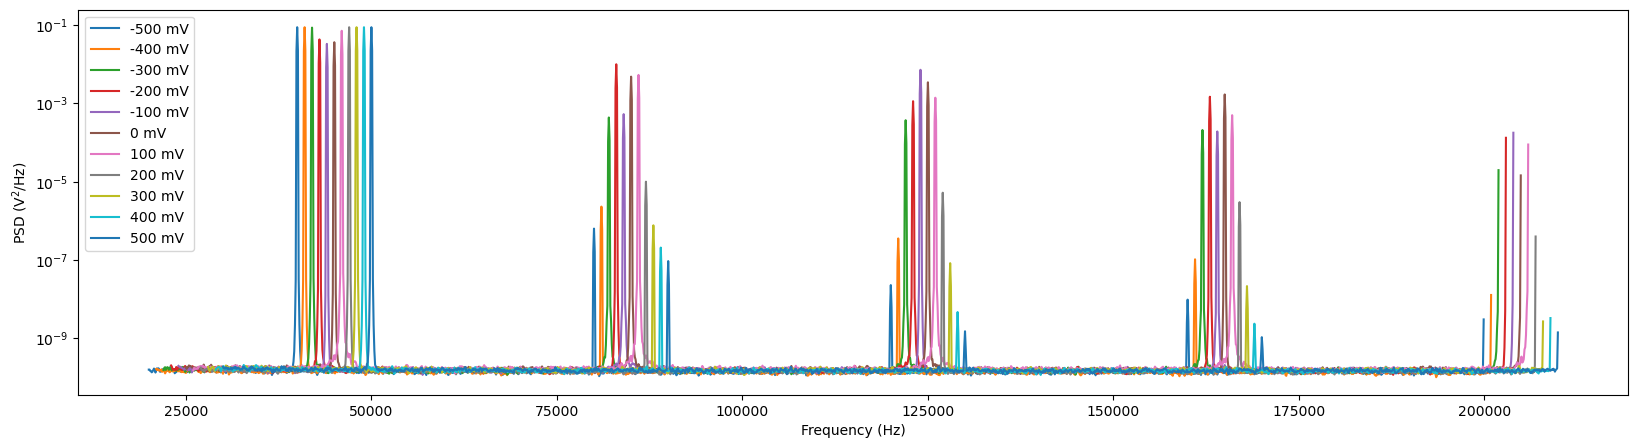

In [16]:
plt.figure(figsize = (20, 5))
lb = 200
ub = 2000
for n, i in enumerate(PSDD):
    plt.plot(i[0][lb+10*n:ub+10*n], i[1][lb:ub], label = str((n-5)*100)+' mV')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (Hz)')
plt.legend()

In [18]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        #PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        #PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    #PSDB = np.array(PSDB)
    return PSDA#, PSDB

filepath = 'D:\\Experiment\\Cooling\\230824\\Summing amp 2\\'
extensions = ['-1000.mat', '-900.mat', '-800.mat', '-700.mat', '-600.mat', '-500.mat', '-400.mat', '-300.mat', '-200.mat', '-100.mat', '0.mat']
channels = ['E']
PSDD = make_PSDs(filepath, extensions, channels)

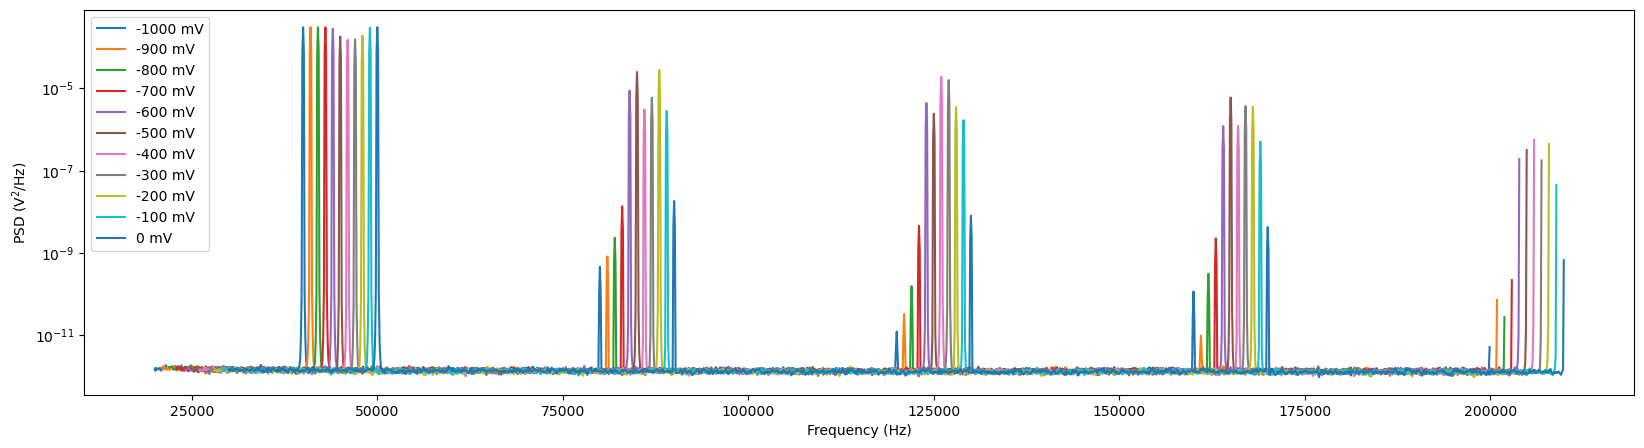

In [21]:
plt.figure(figsize = (20, 5))
lb = 200
ub = 2000
for n, i in enumerate(PSDD):
    plt.plot(i[0][lb+10*n:ub+10*n], i[1][lb:ub], label = str((n-10)*100)+' mV')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (Hz)')
plt.legend()

In [141]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230824\\Pump down\\'
extensions = ['tt1.mat', 'tt2.mat', 'tt3.mat', 'tt4.mat', 'tt5.mat', 'tt6.mat', 'tt7.mat', 'tt8.mat', 'tt9.mat', 'tt10.mat', 'tt11.mat', 'tt12.mat', 'tt13.mat', 'tt14.mat', 'tt15.mat', 'tt16.mat', 'tt17.mat', 'tt18.mat', 'tt19.mat'] 
channels = ['A', 'B']
PSDA, PSDB = make_PSDs(filepath, extensions, channels)

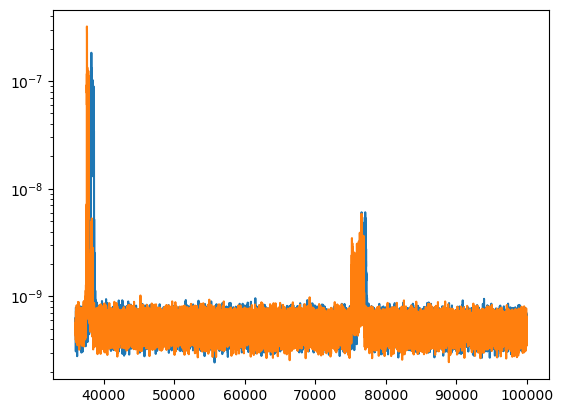

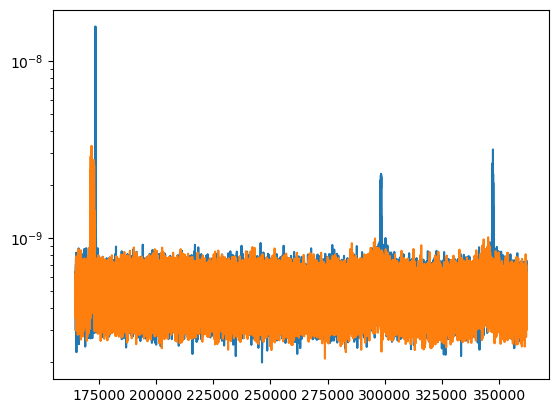

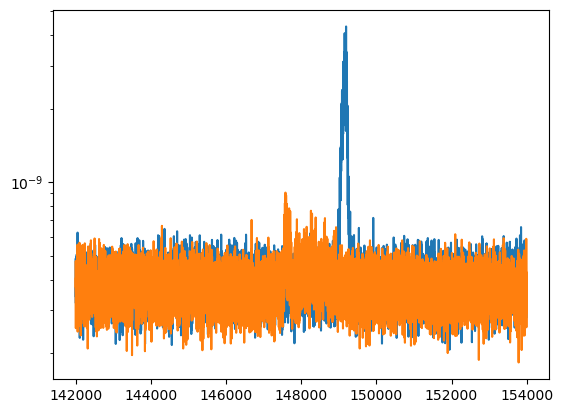

In [142]:
lb1 = 36000
ub1 = 100000
lb2 = 165000
ub2 = 181000*2
lb3 = 142000
ub3 = 154000
for i in PSDA[-2:]:
    plt.plot(i[0][lb1:ub1], i[1][lb1:ub1])
plt.yscale('log')
plt.figure()
for i in PSDA[-2:]:
    plt.plot(i[0][lb2:ub2], i[1][lb2:ub2])
plt.yscale('log')
plt.figure()
for i in PSDB[-2:]:
    plt.plot(i[0][lb3:ub3], i[1][lb3:ub3])
plt.yscale('log')

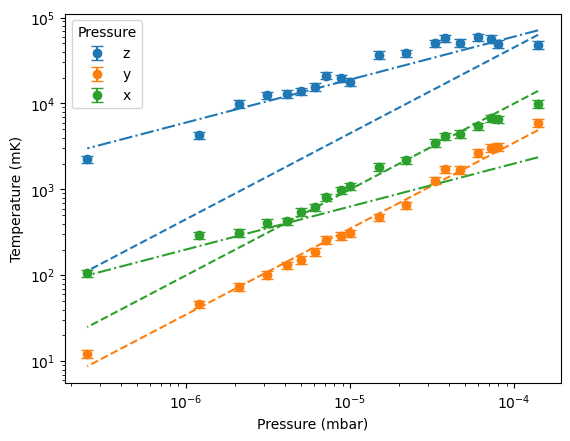

In [130]:
# Taken from 2023/08/23 which is actually this particle
calx = 0.0008499706250714502
caly = 0.014648135860354674
calz = 0.0016724781717892645

areas1 = []
for i in PSDA:
    area = np.trapz(i[1][lb1:ub1], i[0][lb1:ub1])
    areas1.append(area - 5*10**(-10)*5000)
areas2 = []
for i in PSDA:
    area = np.trapz(i[1][lb2:ub2], i[0][lb2:ub2])
    areas2.append(area - 5*10**(-10)*16000)
areas3 = []
for i in PSDB:
    area = np.trapz(i[1][lb3:ub3], i[0][lb3:ub3])
    areas3.append(area - 3.5*10**(-10)*12000)

P = [1.4e-4, 8e-5, 7.2e-5, 6e-5, 4.7e-5, 3.8e-5, 3.3e-5, 2.2e-5, 1.5e-5, 1e-5, 8.8e-6, 7.1e-6, 6.1e-6, 5e-6, 4.1e-6, 3.1e-6, 2.1e-6, 1.2e-6, 2.5e-7]

plt.errorbar(P, np.array(areas1)[:]/calz*293*1000, yerr = 0.1*np.array(areas1[:])/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'z')
plt.errorbar(P, np.array(areas2)[:]/caly*293*1000, yerr = 0.1*np.array(areas2[:])/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'y')
plt.errorbar(P, np.array(areas3)[:]/calx*293*1000, yerr = 0.1*np.array(areas3[:])/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'x')
plt.plot(P, np.array(P)*450000000, '--', color = 'tab:blue')
plt.plot(P, np.sqrt(np.array(P))*6000000, '-.', color = 'tab:blue')
plt.plot(P, np.array(P)*35000000, '--', color = 'tab:orange')
plt.plot(P, np.array(P)*100000000, '--', color = 'tab:green')
plt.plot(P, np.sqrt(np.array(P))*200000, '-.', color = 'tab:green')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Pressure (mbar)')
plt.legend(title = 'Pressure')

In [54]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230824\\z gain\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
#extensions = ['20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
channels = ['A', 'B']
PSDA3, PSDB3 = make_PSDs(filepath, extensions, channels)

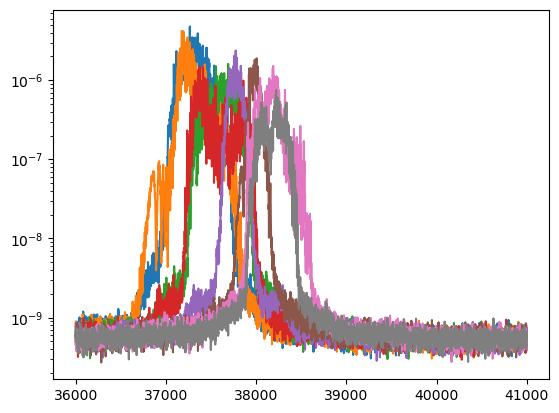

In [55]:
lb1 = 36000
ub1 = 41000
lb2 = 165000
ub2 = 181000
lb3 = 142000
ub3 = 154000
for i in PSDA3:
    plt.plot(i[0][lb1:ub1], i[1][lb1:ub1])
plt.yscale('log')

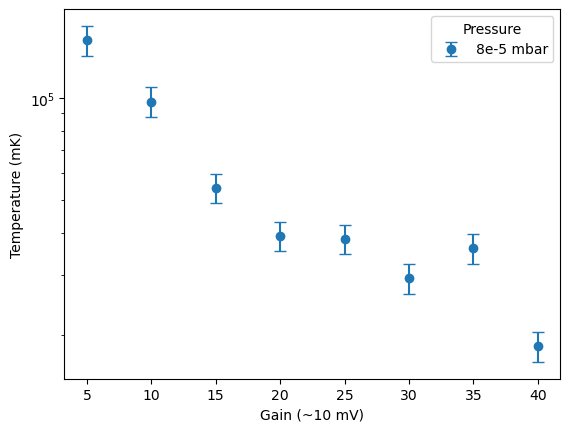

In [58]:
areas3 = []
for i in PSDA3:
    area = np.trapz(i[1][lb1:ub1], i[0][lb1:ub1])
    areas3.append(area - 5*10**(-10)*10000)

#gain1 = [20, 25, 30, 35, 40]
gain1 = [5, 10, 15, 20, 25, 30, 35, 40]

plt.errorbar(gain1, np.array(areas3)/calz*293*1000, yerr = 0.1*np.array(areas3)/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '8e-5 mbar')
#plt.errorbar(gain2, np.array(areas2)/calx*293*1000, yerr = 0.1*np.array(areas2)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.2e-5 mbar')
#plt.errorbar(gain2, np.array(areas3)/calx*293*1000, yerr = 0.1*np.array(areas3)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.4e-6 mbar')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Gain (~10 mV)')
plt.legend(title = 'Pressure')

In [65]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230824\\z phase\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
extensions = ['20.mat', '40.mat', '60.mat', '80.mat', '100.mat', '120.mat', '140.mat']
channels = ['A', 'B']
PSDA3, PSDB3 = make_PSDs(filepath, extensions, channels)

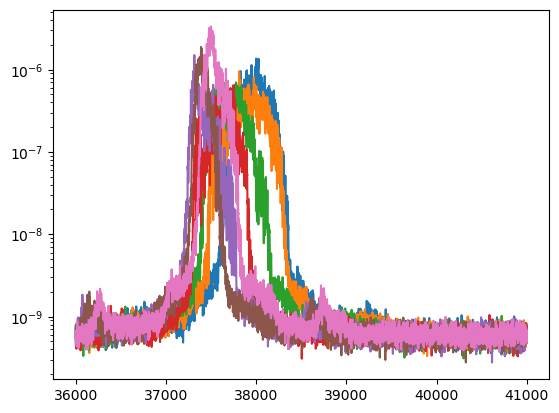

In [66]:
lb1 = 36000
ub1 = 41000
lb2 = 165000
ub2 = 181000
lb3 = 142000
ub3 = 154000
for i in PSDA3:
    plt.plot(i[0][lb1:ub1], i[1][lb1:ub1])
plt.yscale('log')

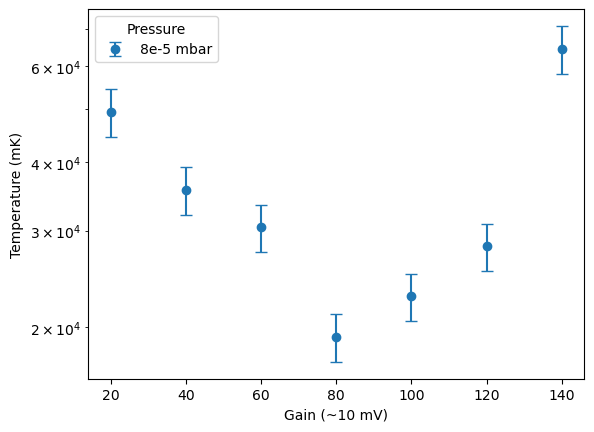

In [67]:
areas3 = []
for i in PSDA3:
    area = np.trapz(i[1][lb1:ub1], i[0][lb1:ub1])
    areas3.append(area - 5*10**(-10)*10000)

#gain1 = [20, 25, 30, 35, 40]
gain1 = [20, 40, 60, 80, 100, 120, 140]

plt.errorbar(gain1, np.array(areas3)/calz*293*1000, yerr = 0.1*np.array(areas3)/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '8e-5 mbar')
#plt.errorbar(gain2, np.array(areas2)/calx*293*1000, yerr = 0.1*np.array(areas2)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.2e-5 mbar')
#plt.errorbar(gain2, np.array(areas3)/calx*293*1000, yerr = 0.1*np.array(areas3)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.4e-6 mbar')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Gain (~10 mV)')
plt.legend(title = 'Pressure')

In [68]:
# changed to lower sampling at 465

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

filepath = 'D:\\Experiment\\Cooling\\230824\\z kp\\'
extensions = ['5.mat', '10.mat', '15.mat', '20.mat', '25.mat', '30.mat', '35.mat', '40.mat']
extensions = ['30.mat', '50.mat', '100.mat']
channels = ['A', 'B']
PSDA3, PSDB3 = make_PSDs(filepath, extensions, channels)

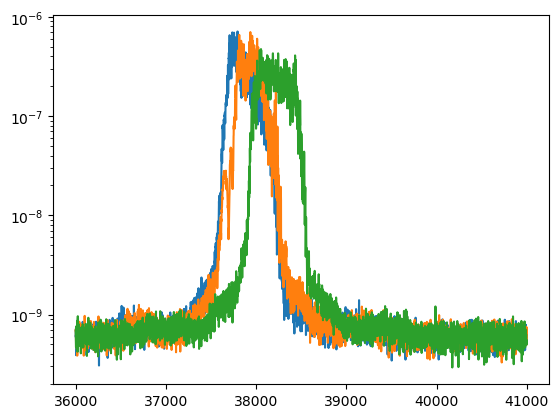

In [69]:
lb1 = 36000
ub1 = 41000
lb2 = 165000
ub2 = 181000
lb3 = 142000
ub3 = 154000
for i in PSDA3:
    plt.plot(i[0][lb1:ub1], i[1][lb1:ub1])
plt.yscale('log')

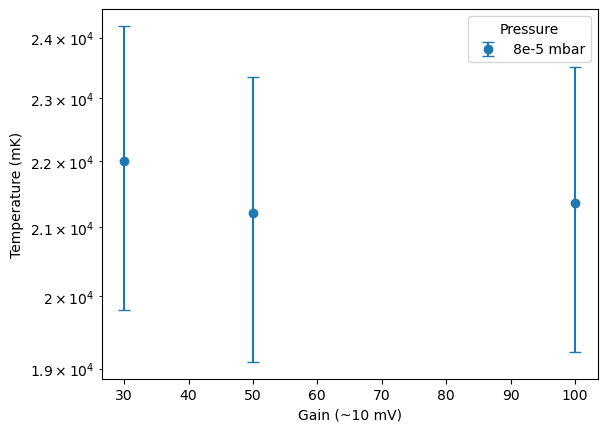

In [71]:
areas3 = []
for i in PSDA3:
    area = np.trapz(i[1][lb1:ub1], i[0][lb1:ub1])
    areas3.append(area - 5*10**(-10)*10000)

#gain1 = [20, 25, 30, 35, 40]
gain1 = [30, 50, 100]

plt.errorbar(gain1, np.array(areas3)/calz*293*1000, yerr = 0.1*np.array(areas3)/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '8e-5 mbar')
#plt.errorbar(gain2, np.array(areas2)/calx*293*1000, yerr = 0.1*np.array(areas2)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.2e-5 mbar')
#plt.errorbar(gain2, np.array(areas3)/calx*293*1000, yerr = 0.1*np.array(areas3)/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = '1.4e-6 mbar')
plt.yscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Gain (~10 mV)')
plt.legend(title = 'Pressure')

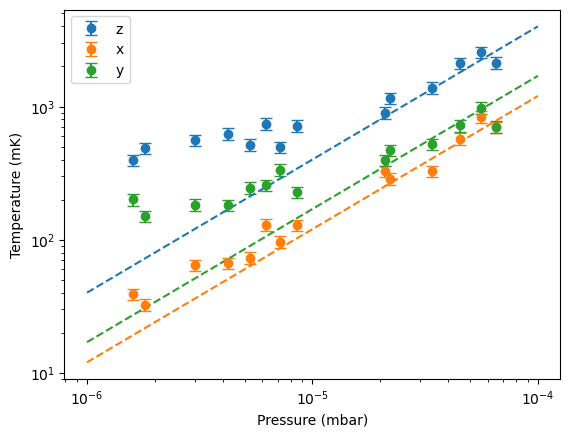

In [612]:
P3 = np.logspace(-6, -4, 100)
plt.errorbar(P, np.array(areas1[:])/calz*293*1000, yerr = 0.1*np.array(areas1[:])/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'z')
plt.errorbar(P, np.array(areas2[:])/caly*293*1000, yerr = 0.1*np.array(areas2[:])/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'x')
plt.errorbar(P, np.array(areas3[:])/calx*293*1000, yerr = 0.1*np.array(areas3[:])/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, label = 'y')
plt.errorbar(P2, np.array(areas12[:])/calz*293*1000, yerr = 0.1*np.array(areas12[:])/calz*293*1000, marker = 'o', linestyle = 'None', capsize = 4, color = 'tab:blue')
plt.errorbar(P2, np.array(areas22[:])/caly*293*1000, yerr = 0.1*np.array(areas22[:])/caly*293*1000, marker = 'o', linestyle = 'None', capsize = 4, color = 'tab:orange')
plt.errorbar(P2, np.array(areas32[:])/calx*293*1000, yerr = 0.1*np.array(areas32[:])/calx*293*1000, marker = 'o', linestyle = 'None', capsize = 4, color = 'tab:green')
plt.plot(P3, np.array(P3)*4e7, '--', color = 'tab:blue')
plt.plot(P3, np.array(P3)*1.2e7, '--', color = 'tab:orange')
plt.plot(P3, np.array(P3)*1.7e7, '--', color = 'tab:green')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Temperature (mK)')
plt.xlabel('Pressure (mbar)')
plt.legend()

In [21]:
filepath = 'D:\\Experiment\\Cooling\\230823\\Pump Down 4\\tt ('
extensions = [str(i) for i in list(range(1, 638, 3))]
channels = ['A', 'B']
A = []
B = []
for i in extensions:
    tts, Tinterval = load_data(filepath+i+').mat', channels)
    A.append(tts[0][0])
    B.append(tts[1][0])

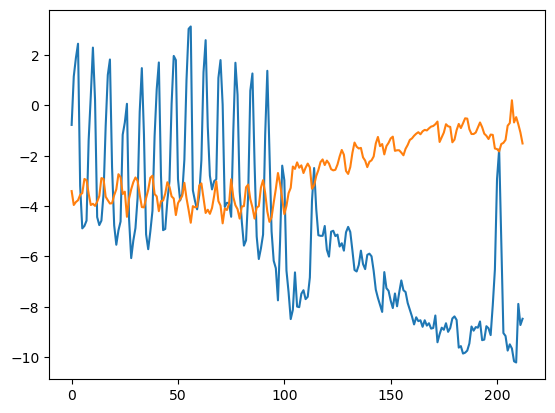

In [22]:
plt.plot(A)
plt.plot(B)

In [134]:
import pandas as pd

filepath = 'D:/Experiment/Temperature/230825/Temperature.csv'
T_data = pd.read_csv(filepath, delimiter=';')


In [135]:
timeT = np.transpose(T_data.to_numpy())[0]
T = np.transpose(T_data.to_numpy())[3]
T2 = np.transpose(T_data.to_numpy())[5]

In [136]:
timeAB = np.array(range(1, 638, 3))*55

Text(0, 0.5, 'Temperature (C)')

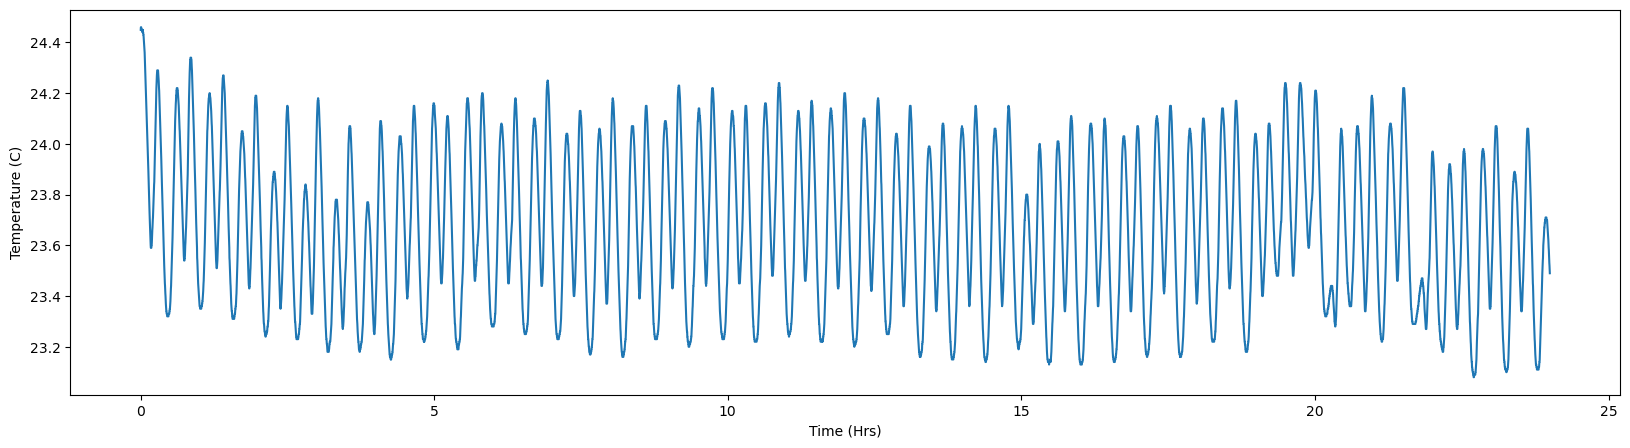

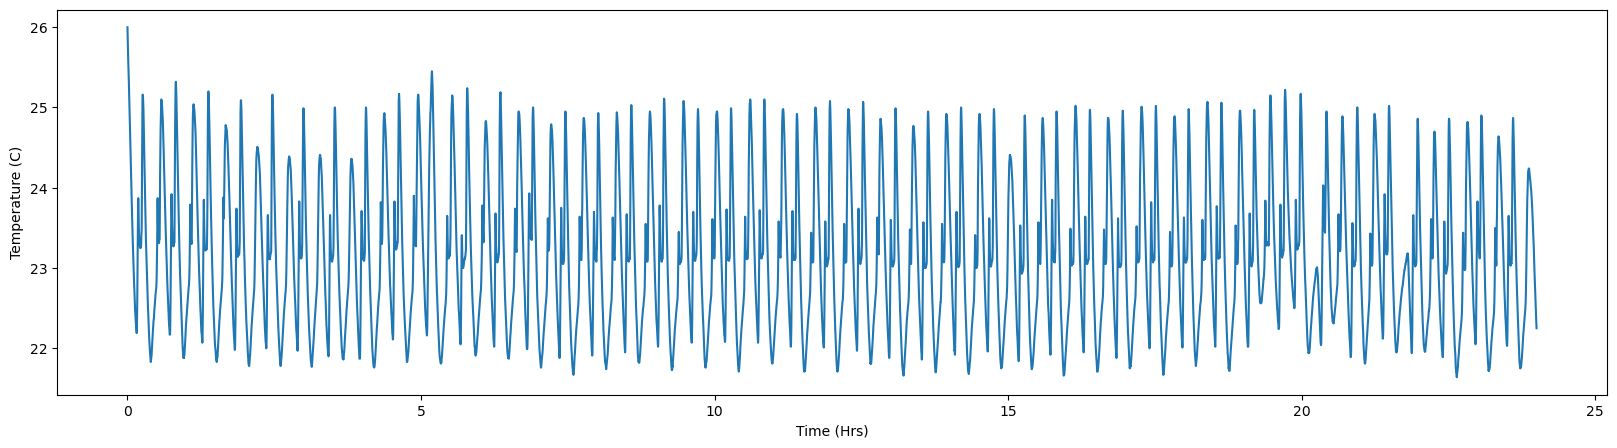

In [140]:
plt.figure(figsize = (20, 5) )
plt.plot(np.array(timeT)/3600, T)
plt.xlabel('Time (Hrs)')
plt.ylabel('Temperature (C)')
plt.figure(figsize = (20, 5) )
plt.plot(np.array(timeT)/3600, T2)
plt.xlabel('Time (Hrs)')
plt.ylabel('Temperature (C)')

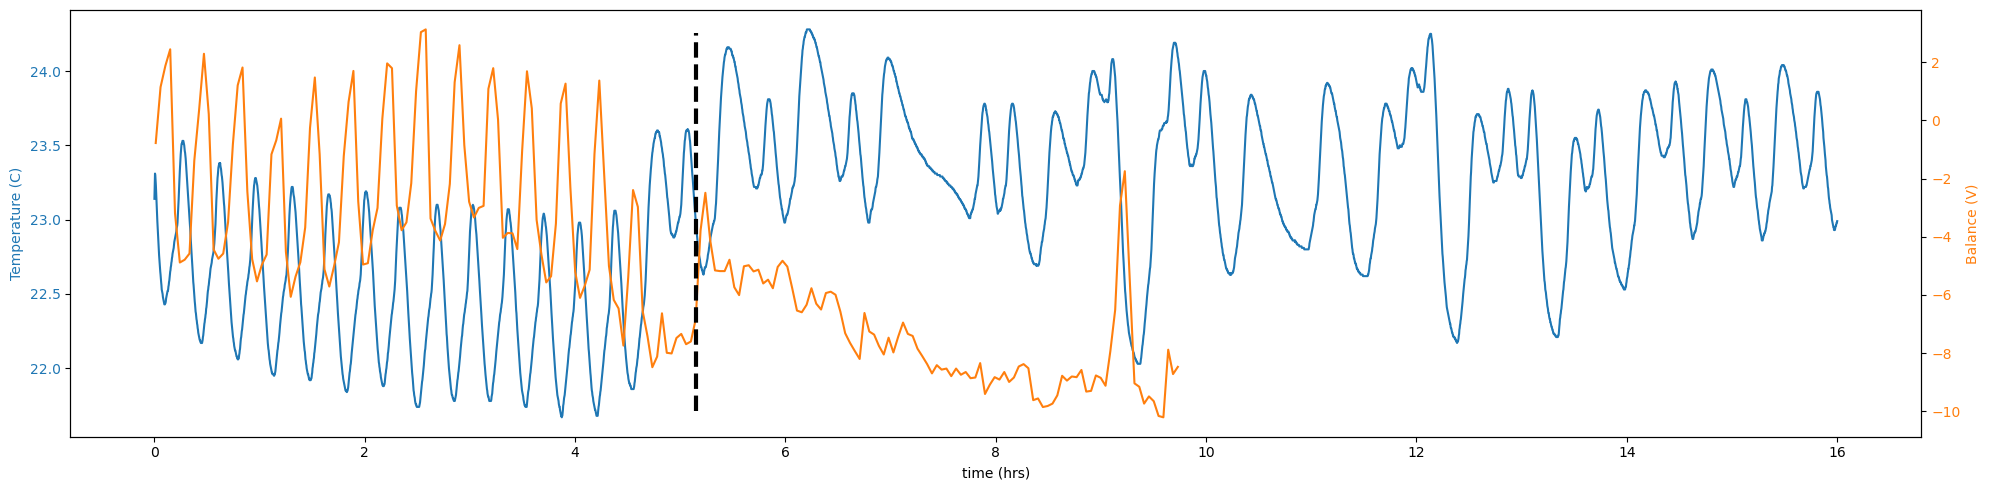

In [62]:
fig, ax1 = plt.subplots(figsize = (20, 5))

color = 'tab:blue'
ax1.set_xlabel('time (hrs)')
ax1.set_ylabel('Temperature (C)', color=color)
ax1.plot(timeT/3600, T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Balance (V)', color=color)  # we already handled the x-label with ax1
ax2.plot(timeAB/3600, A, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.plot([5.15, 5.15], [-10, 3], '--', color = 'k', linewidth = 3)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

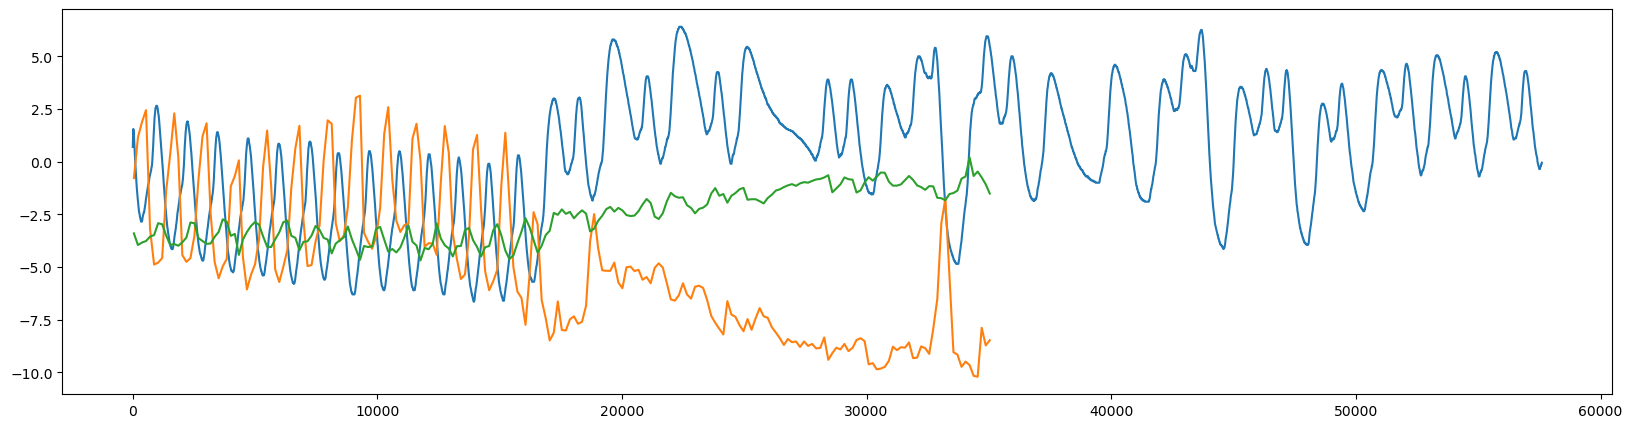

In [54]:
plt.figure(figsize = (20, 5))
plt.plot(timeT, (T-23)*5)
plt.plot(timeAB, A)
plt.plot(timeAB, B)

In [40]:
T_data

,Time [s],Date,Time,Temperature[C],Humidity[%],TH1[C],TH2[C]
0,10,Aug 23 2023,15:59:08,23.14,45.40,21.89,--
1,20,Aug 23 2023,15:59:18,23.24,46.60,22.60,--
2,30,Aug 23 2023,15:59:28,23.31,45.61,23.24,--
3,40,Aug 23 2023,15:59:38,23.30,45.23,23.08,--
4,50,Aug 23 2023,15:59:48,23.27,45.16,22.86,--
...,...,...,...,...,...,...,...
5755,57560,Aug 24 2023,07:58:37,22.96,62.49,22.97,--
5756,57570,Aug 24 2023,07:58:47,22.97,62.45,22.96,--
5757,57580,Aug 24 2023,07:58:57,22.98,62.34,22.99,--
5758,57590,Aug 24 2023,07:59:07,22.98,62.34,23.02,--


In [122]:
s = 100000
PSDs = []
PSDs2 = []
PSDs3 = []
for i in range(200):
    PSD = scisig.welch(tts[0][i*s:(i+1)*s], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDs.append(PSD[1])
    PSD = scisig.welch(tts[1][i*s:(i+1)*s], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDs2.append(PSD[1])
    PSD = scisig.welch(tts[2][i*s:(i+1)*s], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDs3.append(PSD[1])
freq = PSD[0]

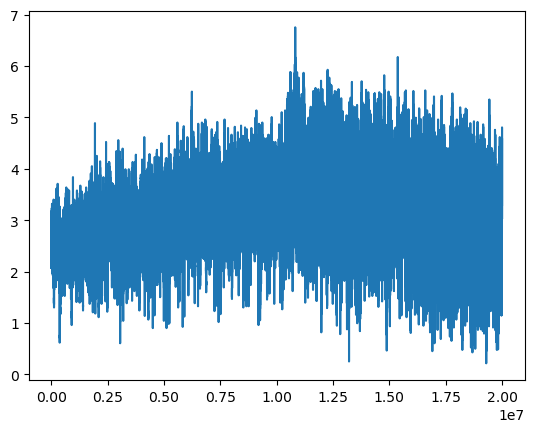

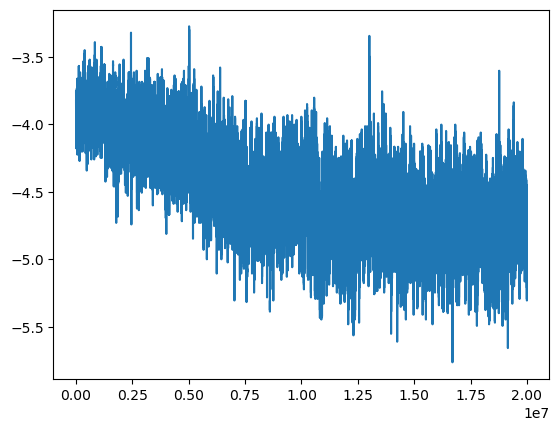

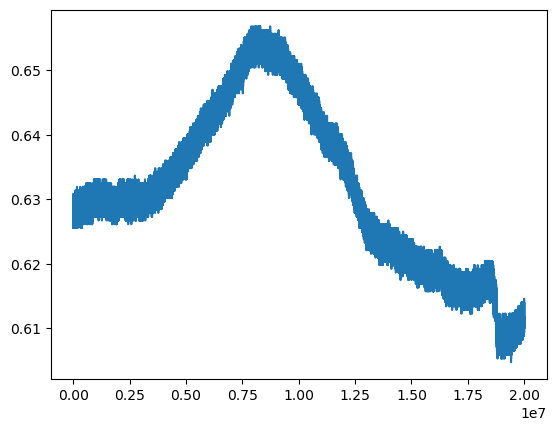

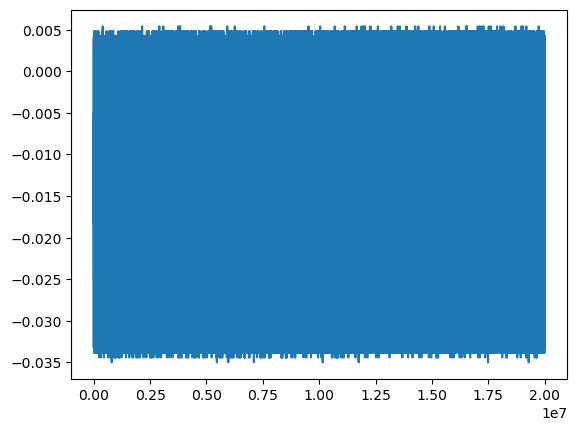

In [147]:
lb = 0#104*100000
ub = -1#105*100000
plt.plot(tts[0][lb:ub])
plt.figure()
plt.plot(tts[1][lb:ub])
plt.figure()
plt.plot(tts[2][lb:ub])
plt.figure()
plt.plot(tts[3][lb:ub])

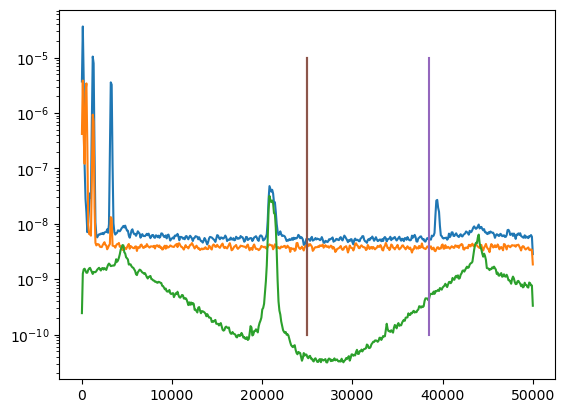

In [136]:
plt.plot(freq, PSDs[103])
plt.plot(freq, PSDs2[103])
plt.plot(freq, PSDs3[103])
plt.plot([25000, 25000], [10**(-10), 10**(-5)])
plt.plot([38500, 38500], [10**(-10), 10**(-5)])
plt.plot([25000, 25000], [10**(-10), 10**(-5)])
plt.yscale('log')

In [24]:
filepath = 'D:\\Experiment\\Cooling\\230822\\Param Scan\\z\\Phase 2\\tt'
extensions = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
channels = ['A']
PSDs = []
areas = []
lb = int(0.1*30000)
ub = int(0.1*45000)
for i in extensions:
    tts, Tinterval = load_data(filepath+i+'.mat', channels)
    PSD = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.1/Tinterval))
    PSDs.append(PSD[1])
    area = np.trapz(PSD[1][lb:ub], PSD[0][lb:ub])
    areas.append(area)
freq = PSD[0]

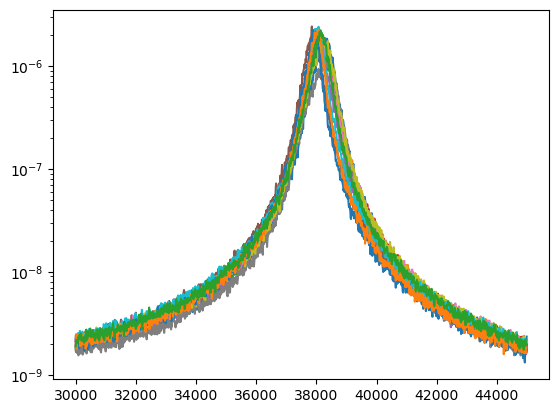

In [25]:
for i in PSDs:
    plt.plot(freq[lb:ub], i[lb:ub])
plt.yscale('log')

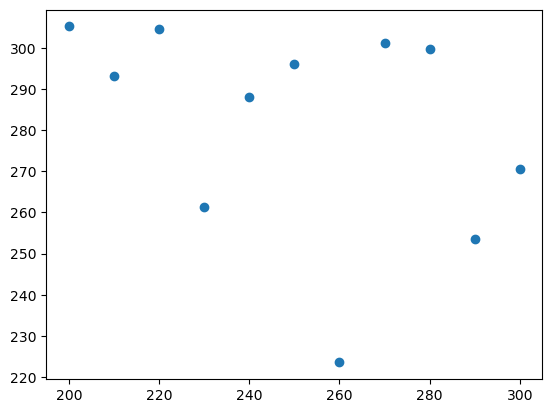

In [28]:
phase = [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
plt.plot(phase, np.array(areas[1:-1])/areas[0]*293, 'o')

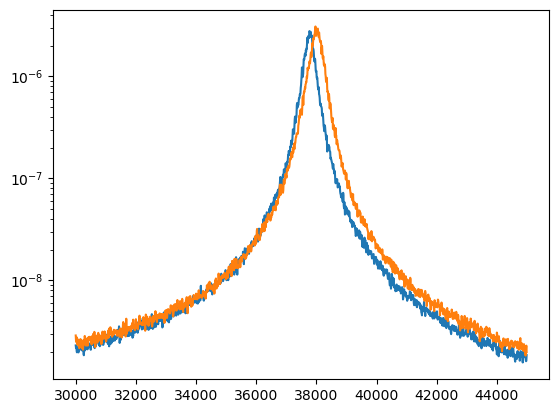

In [22]:
plt.plot(freq[lb:ub], PSDs[1][lb:ub])
plt.plot(freq[lb:ub], PSDs[7][lb:ub])
plt.yscale('log')